In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import random
%matplotlib inline

cubic_spline_data_df = pd.read_excel('data_cubic_spline.xlsx')

In [203]:
print(cubic_spline_data_df.columns.ravel())

['x_value' 'y_value']


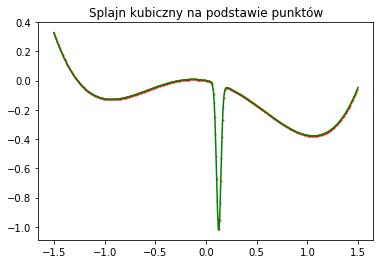

In [204]:
x_value = cubic_spline_data_df['x_value'].tolist()
y_value = cubic_spline_data_df['y_value'].tolist()

plt.scatter(x_value, y_value, alpha=0.7, c='red', s=1)

cs = CubicSpline(x_value, y_value, bc_type='natural')

samples = np.linspace(-1.5, 1.5, 1000)

plt.figure(1)
plt.plot(samples, cs(samples), c='green')
plt.title("Splajn kubiczny na podstawie punktów")
plt.show()

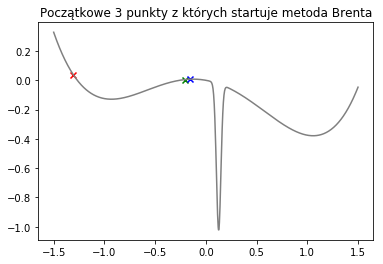

Początkowe wartości

a: -1.305078125 
b: -0.20507812 
c: -0.155078125
fa: 0.03676749765017944 
fb: 0.005048449642732973 
fc: 0.00750474431273917

 
 

OBLICZAM MINIMUM WG. METODY BRENTA 
 

0 
Początkowe przybliżenie minumum:  -0.5424034777090879 


1
Wybieram 3 punkty z 4
-- fd_new < fb i d_new < b
--bisekcja bo nowy przedział jest za duży
Wybieram 3 punkty z 4
-- fd_new < fb i d_new < b
--Nowe przyblżenie minumm -0.730078125
-- sprawdzam różnice wektorów 
 

2
Wybieram 3 punkty z 4
--fd_new > fb i d_new > b
--bisekcja bo nowy przedział jest za duży
Wybieram 3 punkty z 4
-- fd_new < fb i d_new < b
--Nowe przyblżenie minumm -0.755078125
-- sprawdzam różnice wektorów 
 

3
Wybieram 3 punkty z 4
-- fd_new < fb i d_new < b
--bisekcja bo nowy przedział jest za duży
Wybieram 3 punkty z 4
-- fd_new < fb i d_new < b
--Nowe przyblżenie minumm -1.017578125
-- sprawdzam różnice wektorów 
 

4
Wybieram 3 punkty z 4
--fd_new < fb i d_new > b
-- d jest w przedziale i nowy przedział jest dwa razy mn

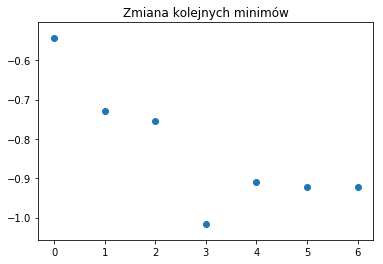

Wartości kolejnych minimów:    [-0.5424034777090879, -0.730078125, -0.755078125, -1.017578125, -0.9090037444176648, -0.9217387988632065, -0.9217387988632065] 




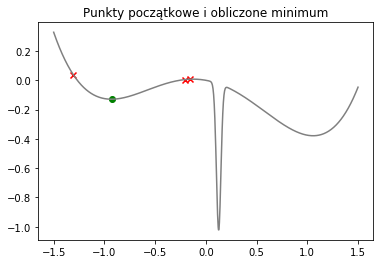

In [210]:
""" Wybieram 3 punkty zgodnie z warunkiem że: a < b < c : f(a) > f(b), f(c)> f(b) """

def wybor_3_punktów_poczatkowych():
    # Wybieram 2 punkty początkowe a i b
    a = np.float32(random.choice(x_value))
    starting_point = a

    step = 0.05
    b = a + step
    i=1
    max_steps = 30


    # określam relacje wartości funkcji dla punków a i b i w zależności od tego jaka jest szukam punktu c
    if cs(a) > cs(b):
        while True:
            c = b + i*step

            if cs(c) > cs(b)  or  i == max_steps  or  cs(c) > max(cubic_spline_data_df['x_value']):
                break
            i+=1
    else:
        while True:
            c = a - i*step

            if cs(c) > cs(a) or i == max_steps or cs(c) < min(cubic_spline_data_df['x_value']):
                a = c
                c = b
                b = starting_point
                break
            i+=1            
    fa = cs(a)
    fb = cs(b)
    fc = cs(c)
    
    return a, b, c, fa, fb, fc

a, b, c, fa, fb, fc = wybor_3_punktów_poczatkowych()

# zapisuje punkty startowe do użycia przy rysowaniu wykresu na końcu
starting_points = [a, b, c]
starting_values = [fa, fb, fc]
    

plt.scatter(a, fa, marker='x', c='red')
plt.scatter(b, fb, marker='x', c='green')
plt.scatter(c, fc, marker='x', c='blue')
plt.plot(samples, cs(samples), c='grey')
plt.title("Początkowe 3 punkty z których startuje metoda Brenta")
plt.show()

print("Początkowe wartości")
print("\na:", a, "\nb:",  b, "\nc:", c)
print("fa:",fa,"\nfb:" ,fb,"\nfc:", fc)
print("\n \n \n")

""" Wybieram punkt d zgodnie ze wzorem z metody Brenta na mimimum interpolacji parabolicznej przeprowadzonej przez punkty (a,fa), (b,fb), (c,fc) """


################################## ALgorytm Brenta #####################



def d_point(a, fa, b, fb, c, fc):
    return 0.5* (((a**2)*(fc - fb) + (b**2)*(fa - fc) + (c**2)*(fb - fa)) / (a*(fc - fb) + b*(fa - fc) + c*(fb - fa)))

# Obliczam pukt d i jego wartość po raz pierwszy, na podstawie wyliczonych punktów i wartości a, b, c




def wybieram_nowy_przedział(a,fa,b,fb,c,fc,d_new,fd_new):
    print("Wybieram 3 punkty z 4")
    if fd_new < fb:   # punkt fd jest niżej niż fb 
        if d_new < b:   # d leży po lewej stronie b - nowe trzy punkty a, d, b
            a_new = a    
            b_new = d_new
            c_new = b
            
            print("-- fd_new < fb i d_new < b" )
        else: # d leży po prawej stronie b - nowe trzy punkty b, d, c
            a_new = b
            b_new = d_new
            c_new = c
            
            print("--fd_new < fb i d_new > b" )
    else:   # punkt fd jest wyżej niż fb, czyli nie za bardzo będzie nas interesował przy wyborze nowych punktów
        if d_new < b:         # d leży po lewej stronie od b
            a_new = d_new
            b_new = b
            c_new = c

            print("--fd_new > fb i d_new < b" )
        else:
            a_new = a
            b_new = b
            c_new = d_new

            print("--fd_new > fb i d_new > b" )
            
    return a_new, b_new, c_new



def bisekcja(a, c): # gdy obliczone ze wzoru d jest poza przedziałem [a,c]
    d_new = (a+c) / 2
    return d_new






"""ALGORYTM METODY BRENTA"""
k=0
list_of_d_points = list()

starting_d_point = d_point(a, fa, b, fb, c, fc)
list_of_d_points.append(starting_d_point)


print("OBLICZAM MINIMUM WG. METODY BRENTA \n \n")
print(k, "\nPoczątkowe przybliżenie minumum: ", starting_d_point, "\n\n")
while True:
    k+=1
    print(k)
    
    # Obliczam punkt d
    d = d_point(a, fa, b, fb, c, fc)
    fd = cs(d)
    
    
    # na tym robimy obliczenia
    d_new = d
    fd_new = fd
    
   
    if a < d_new and d_new < c:
#         a i c to krańce przedziałów. Tym warunkiem sprawdzam czy d jest wewnątrz przedziału [a,c]. 
#         Jeżeli będzie to przechodzimy to kroku z bisekcją przedziału [a,c]
        
        a_new, b_new, c_new = wybieram_nowy_przedział(a,fa,b,fb,c,fc,d_new,fd_new)
        
        if np.abs(c_new - a_new) < np.abs(0.5*(c - a)):
#             czy ten przedział co znalazłem jest mniejszy niż < 0,5 [a,c] - starego przedziału
#             mamy nowy przedział, a_new, b_new, c_new
            print("-- d jest w przedziale i nowy przedział jest dwa razy mniejszy")
    
        else:
#           przedział bym większy niż połowa poprzedniego więc zniego rezygnujemy i używamy bisekcji     
            print("--bisekcja bo nowy przedział jest za duży")
            d_new = bisekcja(a, c)
            fd_new = cs(d_new)
            a_new, b_new, c_new = wybieram_nowy_przedział(a, fa, b, fb, c, fc, d_new, fd_new)

            
            
            
    else:                          # obliczony punkt d jest poza przedziałem [a,c]. Robimy BISEKCJĘ przedziału.
        print("--bisekcja bo d poza przedziałem")
        d_new = bisekcja(a, c)
        fd_new = cs(d_new)
        
        

        
        
#      Po obliczeniu punktów a_new, b_new, c_new sprawdzamy czy nowo obliczone przybliżenie miejsca zerowego b_new jest blisko 
#     obliczonego wcześniej punktu d ze wzoru na minimum funkcji. Jeżeli jest wystarczjąco to kończymy obliczanie.
    
    print("--Nowe przyblżenie minumm", b_new)
    list_of_d_points.append(b_new)
    
    print("-- sprawdzam różnice wektorów \n \n")
    if np.abs(list_of_d_points[k-1] - list_of_d_points[k]) < 0.00001:   # porównuje obliczone minimum z tej iteracji i z poprzedniej
        print("osiągnięto minimum z zadaną dokładnością \n")
        break
     
    # Przepisanie wartości przed kolejną iteracją
    a = a_new
    b = b_new
    c = c_new
    fa = cs(a_new)
    fb = cs(b_new)
    fc = cs(c_new)

    
    
    
    
    
    
    
    
sample = [k for k in range(0, len(list_of_d_points))]
plt.scatter(sample, list_of_d_points)
plt.title("Zmiana kolejnych minimów")
plt.show()
print("Wartości kolejnych minimów:   ", list_of_d_points, "\n\n")




plt.figure(3)
plt.scatter(starting_points, starting_values, c='red', marker='x')
plt.plot(samples, cs(samples), c='grey')
plt.scatter(list_of_d_points[-1], cs(list_of_d_points[-1]), c="green", marker="o")
plt.title("Punkty początkowe i obliczone minimum")
plt.show()